# **Team Details**

In [1]:
"""
TEAM Number : 36
TEAM Members :
1. Dharmick R
2. Krithik Keshav C
3. Aadhithyan Velan M
4. Atul Kumar
"""

'\nTEAM Number : 36\nTEAM Members :\n1. Dharmick R\n2. Krithik Keshav C\n3. Aadhithyan Velan M\n4. Atul Kumar\n'

# **Intalling Dependencies**

In [ ]:
# Necessary dependencies
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Understanding and Preprocessing**


1. Load and inspect the dataset structure (size, variables, data types).
2. Identify numerical and categorical features.
3. Define a dependent feature as the regression target.
4. Justify the selection of numerical input features.






In [7]:
# Loaded dataset
df = pd.read_csv('Dataset.csv')

# Shape and info
df.shape
df.info()

# Missing values
df.isnull().sum()

df.head()


<class 'pandas.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Crop_Type            40000 non-null  str    
 1   Fertilizer_Type      40000 non-null  str    
 2   Nitrogen_kg_ha       40000 non-null  float64
 3   Irrigation_Method    40000 non-null  str    
 4   Irrigation_Water_mm  40000 non-null  float64
 5   Avg_Temperature_C    40000 non-null  float64
 6   Rainfall_mm          40000 non-null  float64
 7   Humidity_%           40000 non-null  float64
 8   CO2_kg_ha            40000 non-null  float64
 9   CH4_kg_ha            40000 non-null  float64
 10  N2O_kg_ha            40000 non-null  float64
 11  Total_GHG_kgCO2e     40000 non-null  float64
 12  Scenario_Type        40000 non-null  str    
 13  Intervention_Type    30000 non-null  str    
dtypes: float64(9), str(5)
memory usage: 4.3 MB


,Crop_Type,Fertilizer_Type,Nitrogen_kg_ha,Irrigation_Method,Irrigation_Water_mm,Avg_Temperature_C,Rainfall_mm,Humidity_%,CO2_kg_ha,CH4_kg_ha,N2O_kg_ha,Total_GHG_kgCO2e,Scenario_Type,Intervention_Type
0,Soybean,Synthetic,232.998485,Sprinkler,798.658484,13.900466,487.193424,42.904181,660.659923,3.832290,2.935502,1631.246917,Baseline,NaN
1,Soybean,Synthetic,141.237938,Sprinkler,713.986285,15.732909,487.193424,42.904181,588.493009,2.439946,1.520592,1102.628022,Counterfactual,Reduced_Input
2,Soybean,Synthetic,161.065486,Sprinkler,642.881174,15.332411,487.193424,42.904181,528.132205,2.406290,2.177719,1237.249832,Counterfactual,Reduced_Input
3,Soybean,Synthetic,160.219869,Sprinkler,617.580538,15.356536,487.193424,42.904181,514.285435,2.693513,1.733796,1098.294460,Counterfactual,Reduced_Input
4,Rice,Mixed,201.886213,Flood,370.524124,11.626290,1438.662645,88.281602,315.108046,15.000000,2.122508,1322.615320,Baseline,NaN


## Target Feature
Total_GHG_kgCO2e

## Input Features
1. Crop_Type
2. Fertilizer_Type
3. Irrigation_Water_mm
4. Nitrogen_kg_ha
5. Avg_Temperature_C
6. Rainfall_mm
7. Humidity_%

We use these input features because they directly control the biological and chemical processes that create greenhouse gas emissions on a farm. 
*Nitrogen* fertilizer is the primary source that is converted into nitrous oxide.
Water inputs from *Irrigation* and *Rainfall* determine whether the soil produces CO2 (dry, oxygen-rich) or CH4 (wet, oxygen-poor).
*Temperature* and *Humidity* act as catalysts for the microbial decay rate, higher temperature and humidity means these microbes break down chemicals to release greenhouse gases into the atmosphere.

# **Exploratory Data Analysis (EDA)**
1. Compute descriptive statistics for numerical variables.
2. Visualize feature distributions using histograms and boxplots.
3. Analyze relationships between inputs and the target using scatter plots.
4. Compute and visualize a correlation matrix.
5. Include additional plots wherever useful.
6. Summarize the key observations and report at least three data-driven insights.

### 2.1 Computing Descriptive Statistics

In [ ]:
# Computing descriptive statistics
stats_summary = df.describe()
print(stats_summary)

       Nitrogen_kg_ha  Irrigation_Water_mm  Avg_Temperature_C   Rainfall_mm  \
count    40000.000000         40000.000000       40000.000000  40000.000000   
mean       142.765778           593.846482          23.444599    896.385823   
std         63.900585           255.983963           7.154821    346.103652   
min         30.613614           140.869913          10.002934    300.063392   
25%         89.472766           377.689330          17.350469    593.812110   
50%        139.421300           585.129210          23.287816    900.339261   
75%        189.122386           794.016279          29.524868   1192.976798   
max        299.971299          1199.878798          36.949406   1499.774383   

         Humidity_%     CO2_kg_ha     CH4_kg_ha     N2O_kg_ha  \
count  40000.000000  40000.000000  40000.000000  40000.000000   
mean      65.242157    503.228100      2.795829      1.712855   
std       14.428698    204.944971      2.287686      0.848229   
min       40.006735    130.7

### 2.2 Visualizing Feature Distributions

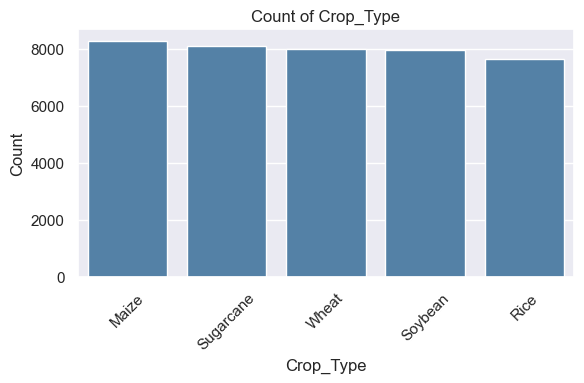

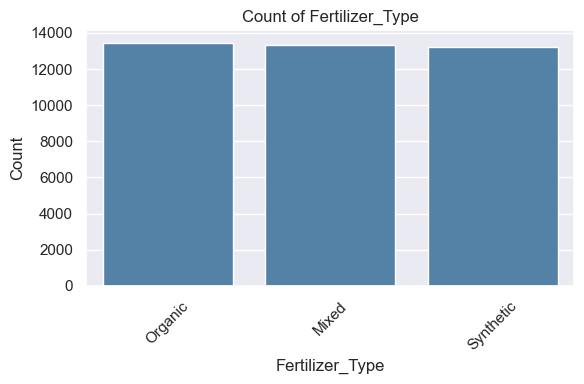

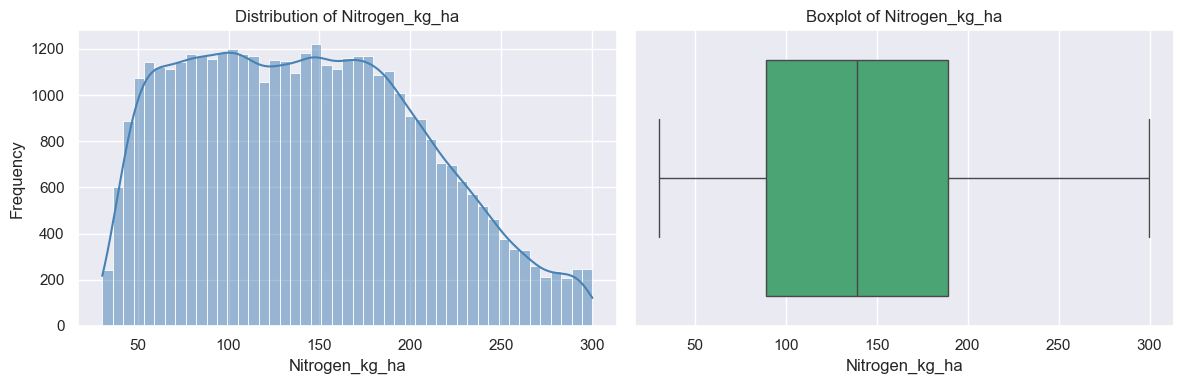

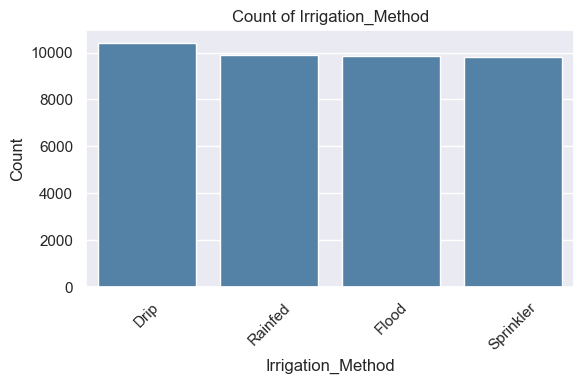

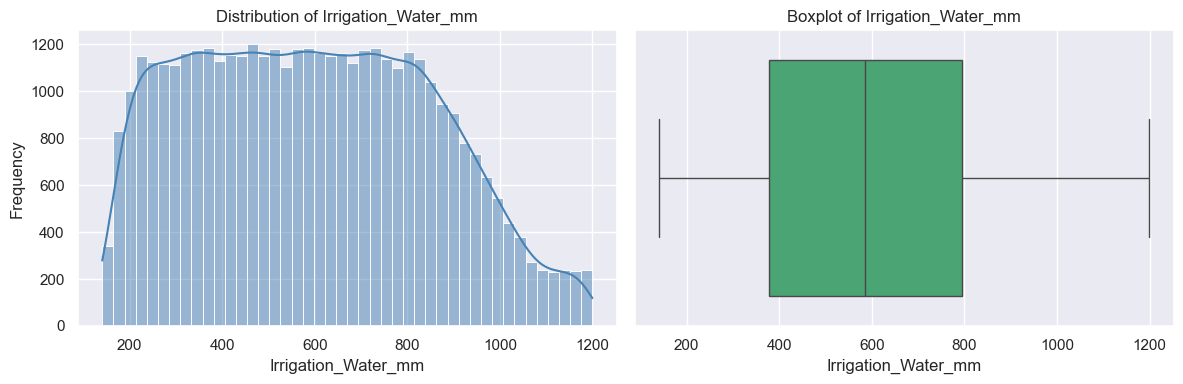

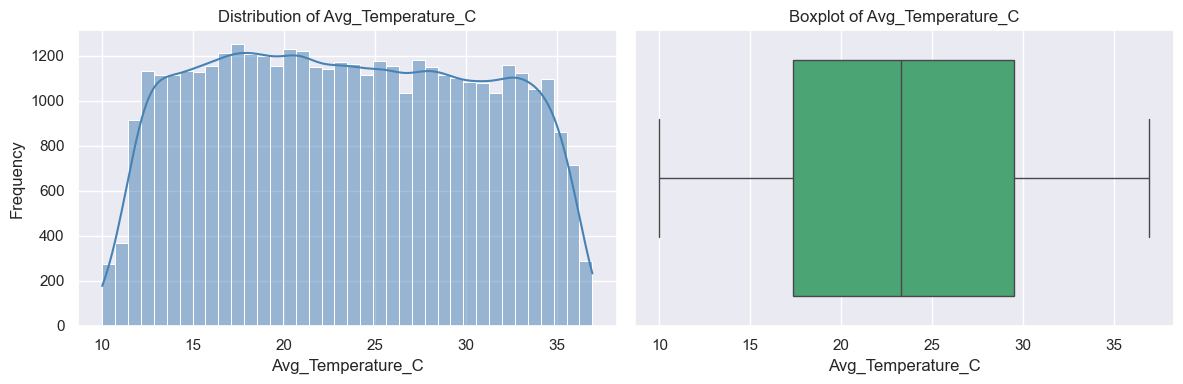

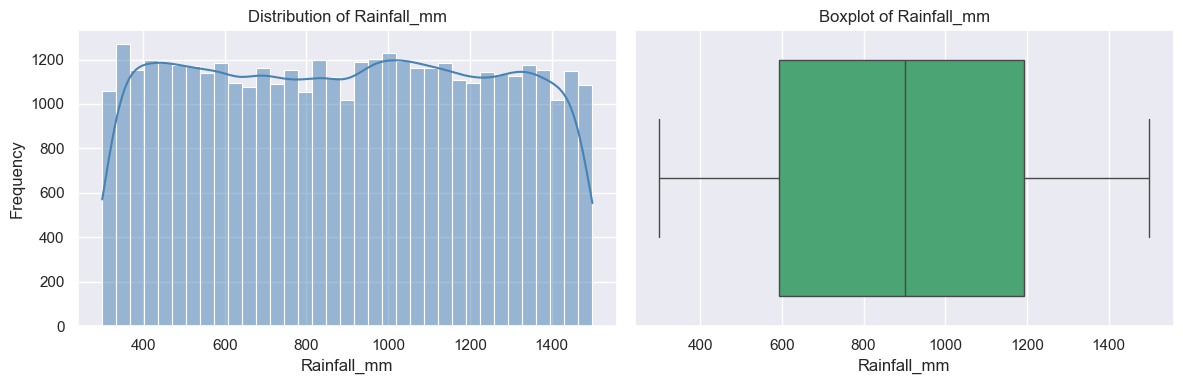

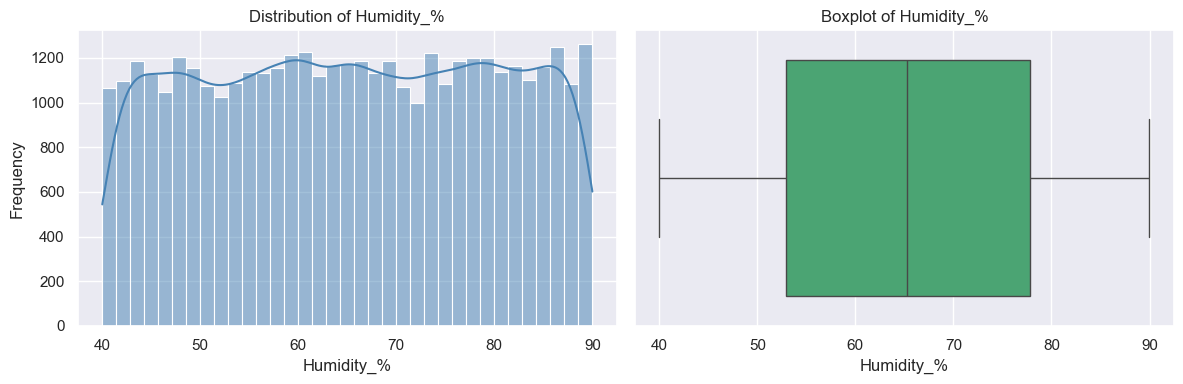

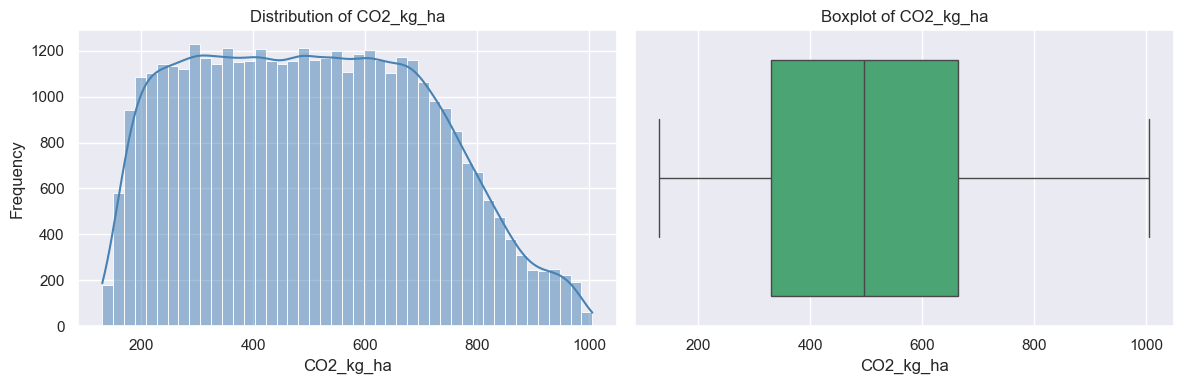

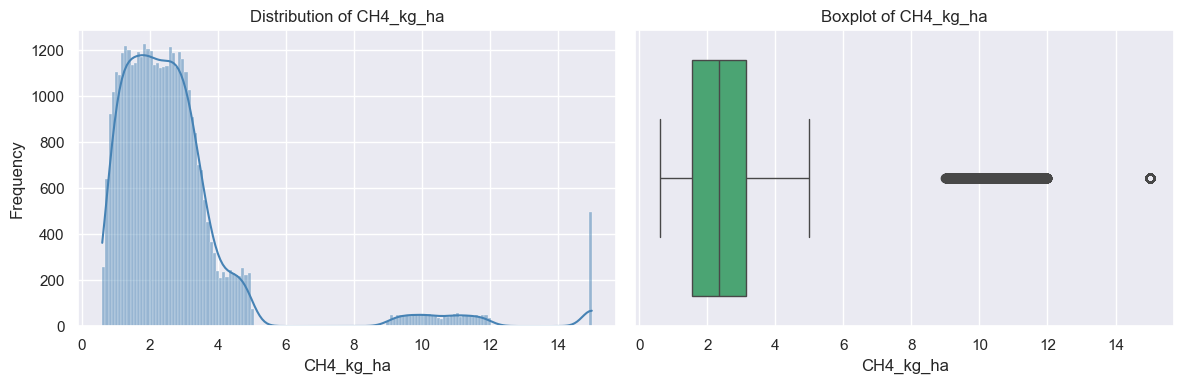

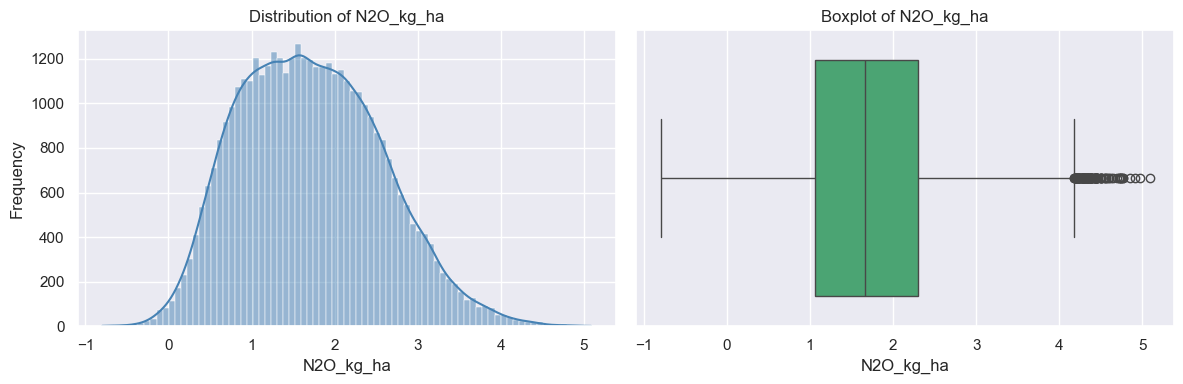

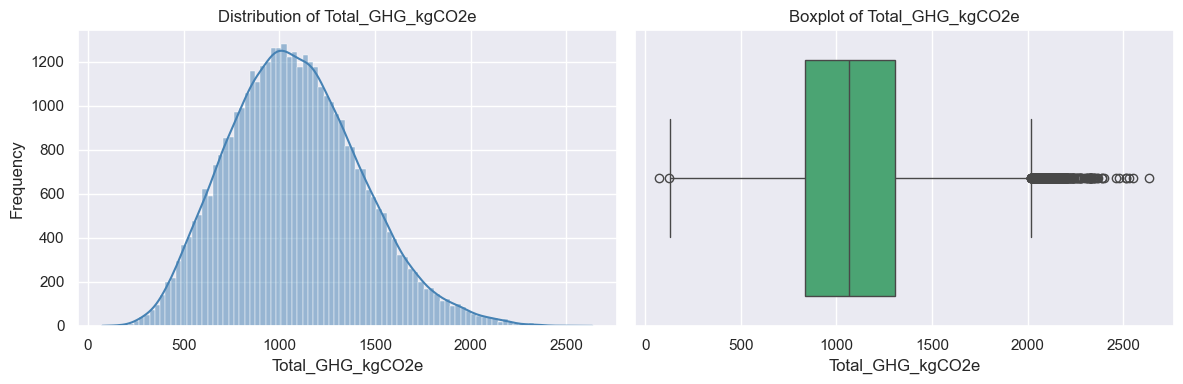

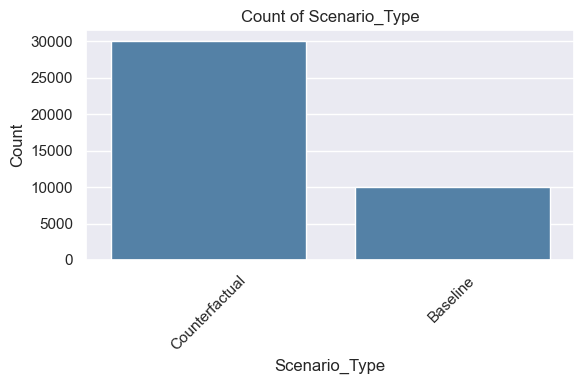

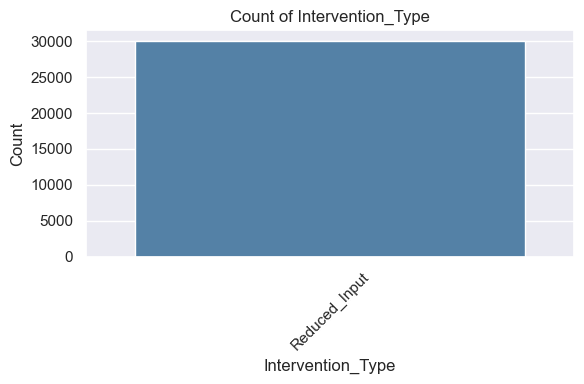

In [14]:
sns.set_theme(style='darkgrid')

for col in df.columns:

    if df[col].dtype == 'str':
        plt.figure(figsize=(6,4))

        counts = df[col].value_counts()

        sns.barplot(x=counts.index, y=counts.values, color='steelblue')

        plt.title(f"Count of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

    else:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        sns.histplot(df[col], kde=True, ax=axes[0], color='steelblue')
        axes[0].set_title(f"Distribution of {col}")
        axes[0].set_ylabel("Frequency")

        sns.boxplot(x=df[col], ax=axes[1], color='mediumseagreen')
        axes[1].set_title(f"Boxplot of {col}")

        plt.tight_layout()
        plt.show()

### 2.3 Scatter plots

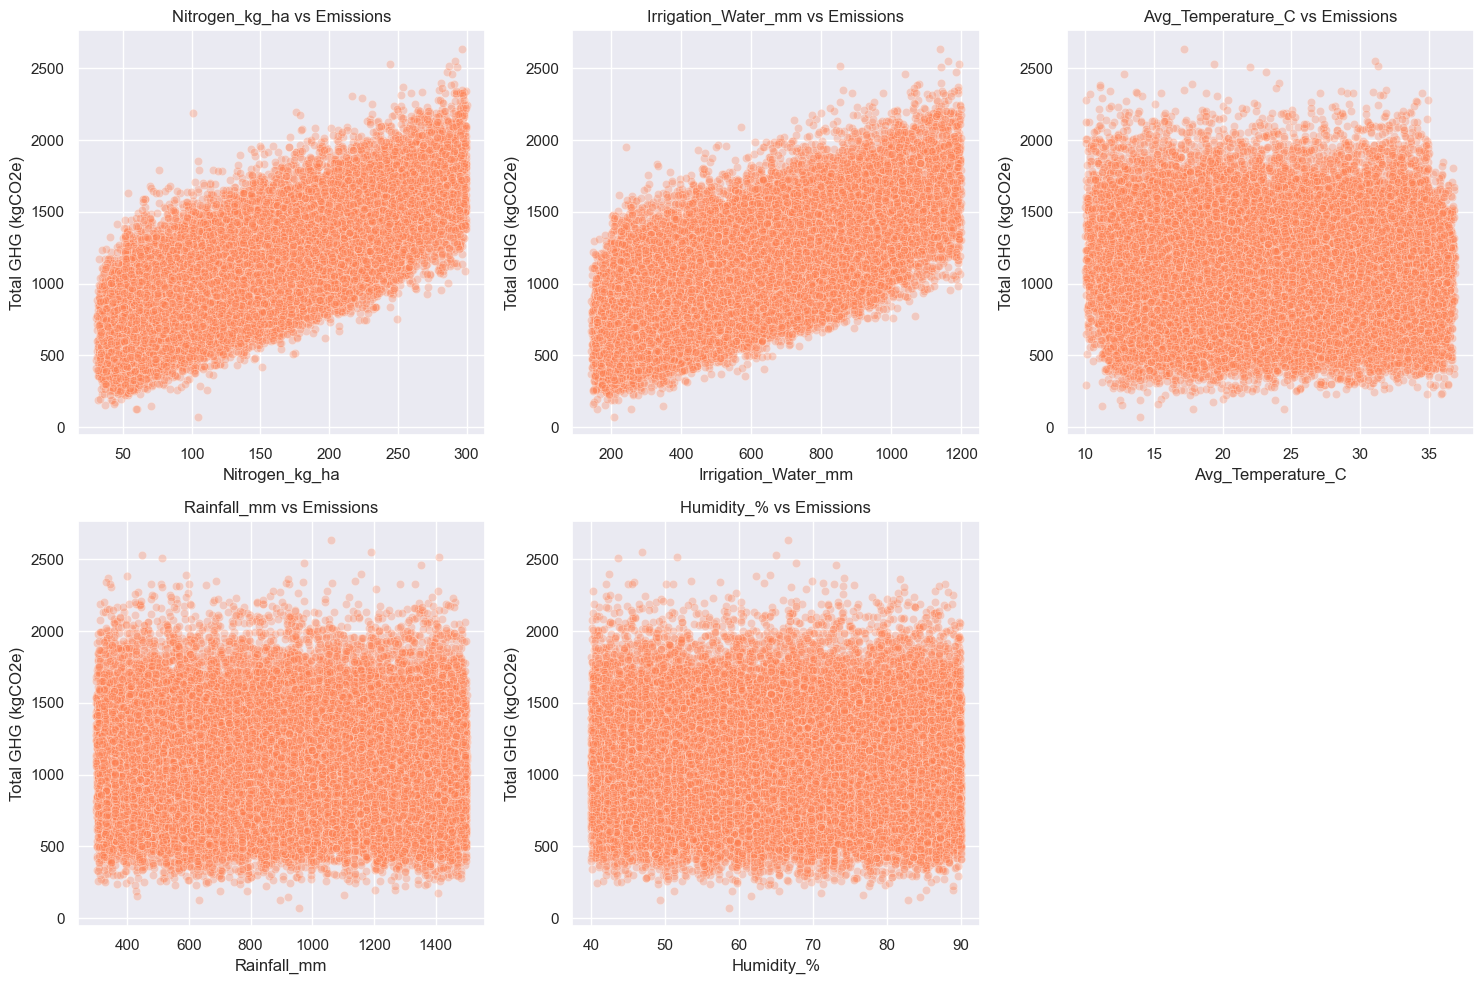

In [15]:
input_features = ['Nitrogen_kg_ha', 'Irrigation_Water_mm', 'Avg_Temperature_C', 'Rainfall_mm', 'Humidity_%']
target_feature = 'Total_GHG_kgCO2e'

plt.figure(figsize=(15, 10))

for i, col in enumerate(input_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df[target_feature], alpha=0.3, color='coral')
    plt.title(f"{col} vs Emissions")
    plt.xlabel(col)
    plt.ylabel("Total GHG (kgCO2e)")

plt.tight_layout()
plt.show()

### 2.4 Correlation matrix

In [ ]:
corr_matrix = 

# **Linear Regression**

1. Formulate emission prediction as a regression problem.
2. Implement Linear Regression using:
    * Batch Gradient Descent
    * Stochastic Gradient Descent
3. Split data into training and testing sets.
4. Evaluate models using MAE, MSE, and R².
5. Compare optimization behavior and results using metrics and plots.
6. Visualize the results


# **Polynomial Regression and Regularization**
1. Apply polynomial features of degree two.
2. Train polynomial regression models with:
    * L1 regularization
    * L2 regularization
3. Evaluate and compare results with linear regression.
4. Summarize the performance differences and the effects of model complexity.
5. Visualize the results

# **Classification Reformulation**
1. Convert the regression task into a classification problem by defining a clear, well-justified labeling strategy (e.g., low/medium/high emissions).
2. Apply a linear classifier:
    * Logistic Regression
    * Naive Bayes
    * Perceptron
3. Present results and discuss the suitability and limitations of the classification approach.
4. Visualize the results

# **Summary**